In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense

In [36]:
df = pd.read_csv("dataset/bitcoin.csv")

In [37]:
df.head()

,Date,Open,High,Low,Close,Vol.
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K


In [4]:
df.describe()

,Open,High,Low,Close
count,3793.000000,3793.000000,3793.000000,3793.000000
mean,11233.252307,11529.297996,10904.581545,11240.315766
std,15421.568722,15827.119004,14960.319732,15422.533996
min,13.300000,13.400000,13.200000,13.300000
25%,450.300000,459.600000,441.900000,451.400000
50%,5208.300000,5322.900000,5033.700000,5209.100000
75%,14976.200000,15648.300000,13902.300000,15043.000000
max,67528.700000,68990.600000,66334.900000,67527.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3793 non-null   object 
 1   Open    3793 non-null   float64
 2   High    3793 non-null   float64
 3   Low     3793 non-null   float64
 4   Close   3793 non-null   float64
 5   Vol.    3793 non-null   object 
dtypes: float64(4), object(2)
memory usage: 177.9+ KB


In [38]:
df.shape

(3793, 6)

In [39]:
#creating a new feature 
closed = df[['Date','Close']]
closed.shape

(3793, 2)

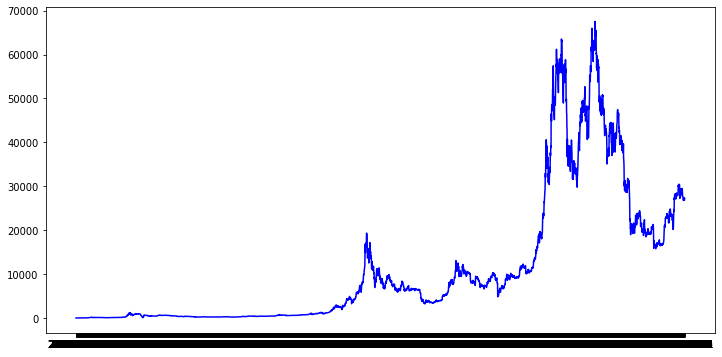

In [6]:
plt.figure(1,figsize=(12,6))
plt.plot(closed['Date'], closed['Close'], color='blue', label='Close Price')
plt.show()

In [40]:
price1 = closed[closed['Date'] >= '2021-01-01'] #in bracket there is a condition 
#that says just put the data from 2021-01-01 to the end of the data set
price1

,Date,Close
2922,2021-01-01,29359.9
2923,2021-01-02,32193.3
2924,2021-01-03,32958.9
2925,2021-01-04,32022.6
2926,2021-01-05,33991.5
...,...,...
3788,2023-05-17,27403.1
3789,2023-05-18,26828.0
3790,2023-05-19,26882.9
3791,2023-05-20,27116.2


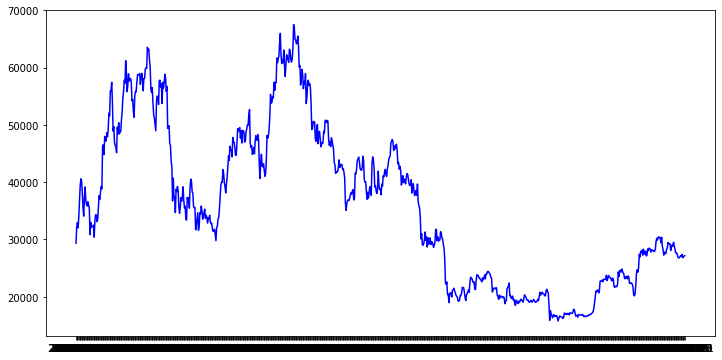

In [41]:
plt.figure(1,figsize=(12,6))
plt.plot(price1['Date'], price1['Close'], color='blue', label='Close Price')
plt.show()

In [ ]:
x =price1['Close'][0:3]
print(x)

2922    29359.9
2923    32193.3
2924    32958.9
Name: Close, dtype: float64


In [42]:
x = closed['Close']
x.shape

(3793,)

In [43]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1)) #minmax scaler is used to scale the data between 0 and 1
x  = scaler.fit_transform(np.array(x).reshape(-1,1)) #this is used to fit the data and transform it into a numpy array

In [44]:
x_train = x[0:3000]
x_test = x[3000:3400] #this is used to split the data into training and testing data
x_val = x[3400:] 

In [45]:
#train dataset
x1=[]
y1=[]
a=[]
b=[]
for i in range(len(x_train)-10-1):
    a = x_train[i:i+10,0] #this is used to create a list of 5 elements from the training data
    b = x_train[i+10] #this is used to create a list of 1 element from the training data
    x1.append(a)
    y1.append(b)

x_train1 = np.array(x1)
y_train1 = np.array(y1)
    
print(x_train1.shape)
x_train1.shape, y_train1.shape

 #dataset for test
x2=[]
y2=[]
c=[]
d=[]
for i in range(len(x_test)-10-1):
    c = x_test[i:i+10,0] #this is used to create a list of 5 elements from the training data
    d = x_test[i+10] #this is used to create a list of 1 element from the training data
    x2.append(c)
    y2.append(d)

x_test1 = np.array(x2)
y_test1 = np.array(y2)
    
print(x_test1.shape)

#val datasset
x3=[]
y3=[]
e=[]
f=[]
for i in range(len(x_val)-10-1):
    e = x_val[i:i+10,0] #this is used to create a list of 5 elements from the training data
    f = x_val[i+10] #this is used to create a list of 1 element from the training data
    x3.append(e)
    y3.append(f)

x_val1 = np.array(x3)
y_val1 = np.array(y3)

print(x_val1.shape)



(2989, 10)
(389, 10)
(382, 10)


In [46]:
#lstm format [tedad, length, features]
#so we need reshaping becayse we need 3 dimension
x_train1 = x_train1.reshape(2989,10,1)
x_test1 = x_test1.reshape(389,10,1)
x_val1 = x_val1.reshape(382,10,1)


print(x_train1.shape)
print(x_test1.shape)
print(x_val1.shape)

(2989, 10, 1)
(389, 10, 1)
(382, 10, 1)


In [47]:
#making the model
model = Sequential()

model.add(LSTM(units=10, activation='relu', input_shape = (None,1)))
model.add(Dense(1))

#compiling the model
model.compile(loss="mean_squared_error", optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
#teaching model
history = model.fit(x_train1, y_train1,
                    validation_data=(x_val1, y_val1),
                    epochs=100,
                    validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 1.6581e-04 - val_loss: 0.0012
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 1.5286e-04 - val_loss: 9.8374e-04
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 1.5297e-04 - val_loss: 8.9146e-04
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 1.4170e-04 - val_loss: 0.0017
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 1.5449e-04 - val_loss: 9.2542e-04
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 1.4891e-04 - val_loss: 0.0010
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 1.4180e-04 - val_loss: 0.0014
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 1.4725e-04 - val_loss: 0.0012
Epoch 10/100
94/94 [==============================] - 0s 2ms/step

In [49]:
train_predict = model.predict(x_train1)
test_predict = model.predict(x_test1)
val_predict = model.predict(x_val1)

12/12 [==============================] - 0s 2ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
val_predict = scaler.inverse_transform(val_predict)

#getting the original data
original_ytrain = scaler.inverse_transform(y_train1.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test1.reshape(-1,1))
original_yval = scaler.inverse_transform(y_val1.reshape(-1,1))

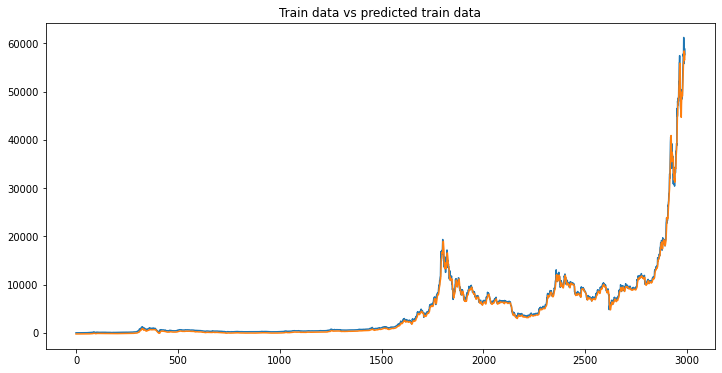

In [51]:
#training set evaluation
plt.figure(1,figsize=(12,6))

plt.title('Train data vs predicted train data')
plt.plot(original_ytrain)
plt.plot(train_predict)
plt.show()

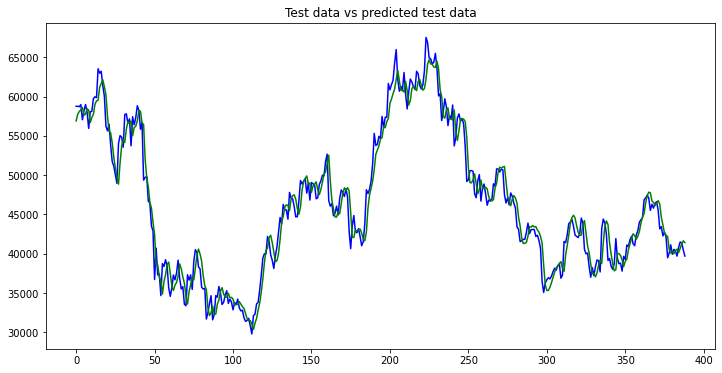

In [52]:
plt.figure(1,figsize=(12,6))

plt.title('Test data vs predicted test data')
plt.plot(original_ytest , 'b')
plt.plot(test_predict, 'g')
plt.show()

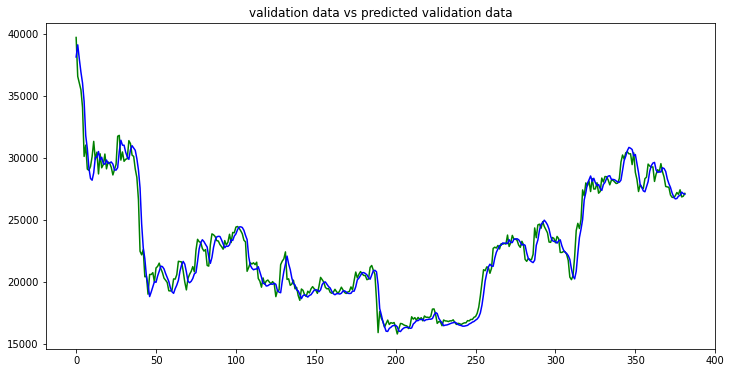

In [53]:
plt.figure(1,figsize=(12,6))

plt.title('validation data vs predicted validation data')
plt.plot(original_yval, 'g')
plt.plot(val_predict , 'b')
plt.show()